In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, balanced_accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# getting the cleaned data from the personal Google Drive
!gdown '1lWHKyBpIbQelBgaw6RUzEaBPRvPz5k8v' -O train_balanced_bin_22_features.csv
!gdown '1wvs9kJ-_qJg-ojvKqjg0pfgVrtjnqsPc' -O test_balanced_bin_22_features.csv


Downloading...
From: https://drive.google.com/uc?id=1lWHKyBpIbQelBgaw6RUzEaBPRvPz5k8v
To: /content/train_balanced_bin_22_features.csv
100% 59.2M/59.2M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wvs9kJ-_qJg-ojvKqjg0pfgVrtjnqsPc
To: /content/test_balanced_bin_22_features.csv
100% 10.4M/10.4M [00:00<00:00, 152MB/s]


In [ ]:
# Colab
train = pd.read_csv('train_balanced_bin_22_features.csv')
test = pd.read_csv('test_balanced_bin_22_features.csv')

In [ ]:
# # Local
# train = pd.read_csv('../data/train_balanced_bin.csv')
# test = pd.read_csv('../data/test_balanced_bin.csv')

In [ ]:
train.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sload,spkts,stcpb,...,sjit,djit,sintpkt,dintpkt,tcprtt,ct_srv_src,ct_src_ltm,ct_dst_sport_ltm,attack_cat,label
0,1043,53,0.000006,264,0,60,0,1.760000e+08,2,0,...,0.000000,0.000000,0.006000,0.000000,0.000000,25,25,13,Normal,0
1,49459,50626,0.028047,3390,44988,31,29,9.498342e+05,56,2353430619,...,30.914173,29.677431,0.512981,0.481158,0.000742,2,2,1,Normal,0
2,54264,53,0.001079,146,178,31,29,5.412419e+05,2,0,...,0.000000,0.000000,0.009000,0.008000,0.000000,2,6,1,Normal,0
3,52762,25,1.102414,37308,3172,31,29,2.655336e+05,52,3780377668,...,1786.695700,59.592686,21.608590,29.782433,0.000585,2,2,1,Normal,0
4,7514,80,1.147243,18890,1087890,31,29,1.313549e+05,354,4147615496,...,192.641300,115.099230,3.249096,1.539207,0.000649,1,2,1,Normal,0


In [ ]:
train.shape, train.label.value_counts()

((546180, 24),
 0    273090
 1    273090
 Name: label, dtype: int64)

In [ ]:
test.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sload,spkts,stcpb,...,sjit,djit,sintpkt,dintpkt,tcprtt,ct_srv_src,ct_src_ltm,ct_dst_sport_ltm,label,attack_cat
0,21459,63318,0.016364,2854,29182,31,29,1.364947e+06,46,3229994277,...,20.977210,20.363316,0.362545,0.361091,0.000585,4,5,1,0,Normal
1,1043,53,0.000007,264,0,60,0,1.508571e+08,2,0,...,0.000000,0.000000,0.007000,0.000000,0.000000,16,16,8,0,Normal
2,47636,6881,0.013123,1540,1644,31,29,8.802865e+05,16,2230321286,...,58.841938,1.350065,0.852533,0.744588,0.000580,9,5,1,0,Normal
3,55900,53,0.000991,146,178,31,29,5.893038e+05,2,0,...,0.000000,0.000000,0.004000,0.006000,0.000000,2,1,1,0,Normal
4,47439,53,0.000008,264,0,60,0,1.320000e+08,2,0,...,0.000000,0.000000,0.008000,0.000000,0.000000,32,32,12,0,Normal


In [ ]:
test.shape, test.label.value_counts()

((96386, 24),
 0    48193
 1    48193
 Name: label, dtype: int64)

In [ ]:
X_train = train.drop(['attack_cat', 'label'], axis=1)
y_train = train['label']

X_test = test.drop(['attack_cat', 'label'], axis=1)
y_test = test['label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((546180, 22), (546180,), (96386, 22), (96386,))

### Helper Functions

In [ ]:
def train_model(clf, X_train, y_train, X_test, y_test, labels, n_classes=2, use_best_model=False):
    from time import process_time
    """
    This function will fit a model to the data and return main metrics
    :param clf - model
    :params X_train, y_train, X_test, y_test - datasets
    :param labels - class labels
    :param n_classes - number of classses
    :return time_to_train, accuracy, balanced_accuracy, precision, recall, f1
    """

    start_time = process_time()
    if use_best_model == False:
        clf.fit(X_train, y_train)
    else:
        clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose_eval=100,
              use_best_model=True, plot=True)

    time_to_train = process_time() - start_time

    y_pred = clf.predict(X_test)

    # accuracy, balanced_accuracy, precision, recall, f1 = calculate_metrics(
    #     y_test, y_pred, labels)

    return time_to_train, clf, y_pred

In [ ]:
def calculate_metrics(y_true, y_pred, labels):


    """
    Calculate main metrics:
    :param y_test - actual value
    :param y_pred - predicted value
    :param labels - class labels
    :return balanced_accuracy, accuracy, precision, recall, f1
    """
    accuracy = accuracy_score(y_true, y_pred)
    # The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. 
    # It is defined as the average of recall obtained on each class.
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)

    # tp / (tp + fp) Ability of the classifier not to label as positive a sample that is negative.
    precision = precision_score(y_true, y_pred, average='weighted')

    # tp / (tp + fn) Ability of the classifier to find all the positive samples.
    recall = recall_score(y_true, y_pred, average='weighted')

    # F1 = 2 * (precision * recall) / (precision + recall)
    # harmonic mean of the precision and recall
    f1 = f1_score(y_true, y_pred, average='weighted')


    print(f'Accuracy:{accuracy:.2f}')
    print(f'Balanced accuracy:{balanced_accuracy:.2f}')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'F1-score:{f1:.2f}') 

    cnf_matrix = confusion_matrix(y_true, y_pred, normalize='true')

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title('Balanced Accuracy on Test Set: {0}%\n'.format("%.2f" % (balanced_accuracy*100.0)), size=14)
    ax.set_ylabel('Actual Label')
    ax.set_xlabel('Predicted Label')

    sns.heatmap(cnf_matrix,
              square=True,
              annot=True,
              cbar=False,
              fmt=".2f",
              linewidths=0.1,
              cmap="Greens",
              xticklabels=labels,
              yticklabels=labels,
              ax=ax)
    plt.tight_layout()
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    print('Classification Report:\n',
      classification_report(y_true,
                            y_pred,
                            target_names=labels))
    return accuracy, balanced_accuracy, precision, recall, f1  

### Standardization

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Classifiers

### Random Forest - 99.32%

In [ ]:
rf = RandomForestClassifier()

In [ ]:
time_to_train_rf, trained_rf, y_pred_rf = train_model(rf, 
                                                      X_train_std, 
                                                      y_train, 
                                                      X_test_std, 
                                                      y_test, 
                                                      ['Normal', 'Attack'], 
                                                      n_classes=2, 
                                                      use_best_model=False)

In [ ]:
time_to_train_rf

66.86596677200001

Accuracy:0.99
Balanced accuracy:0.99
Precision:0.99
Recall:0.99
F1-score:0.99


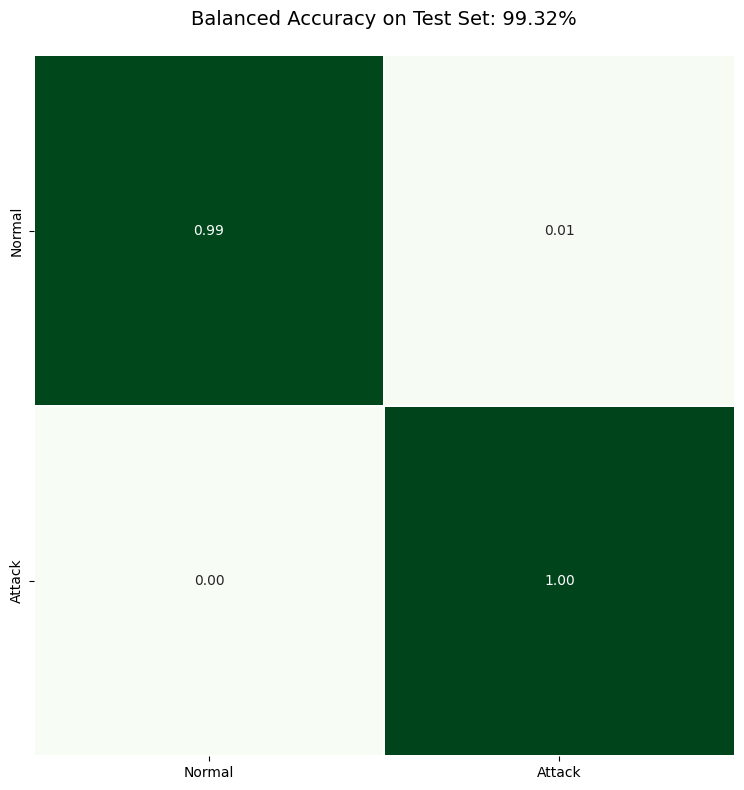

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     48193
      Attack       0.99      1.00      0.99     48193

    accuracy                           0.99     96386
   macro avg       0.99      0.99      0.99     96386
weighted avg       0.99      0.99      0.99     96386



(0.9932044072790654,
 0.9932044072790653,
 0.9932495409457025,
 0.9932044072790654,
 0.9932042518217322)

In [ ]:
calculate_metrics(y_test, y_pred_rf, ['Normal', 'Attack'])

In [ ]:
# Exporting the model
from joblib import dump, load
dump(trained_rf, 'trained_rf_bin.joblib') 

# load with
# trained_rf = load('trained_rf_bin.joblib')

['trained_rf_bin.joblib']

### Logistic Regression - 98.93%

In [ ]:
lr = LogisticRegression(C=1.0, random_state=1, solver='liblinear')

In [ ]:
time_to_train_lr, trained_lr, y_pred_lr = train_model(lr, 
                                                      X_train_std, 
                                                      y_train, 
                                                      X_test_std, 
                                                      y_test, 
                                                      ['Normal', 'Attack'], 
                                                      n_classes=2, 
                                                      use_best_model=False)

In [ ]:
time_to_train_lr

6.115753050000009

Accuracy:0.99
Balanced accuracy:0.99
Precision:0.99
Recall:0.99
F1-score:0.99


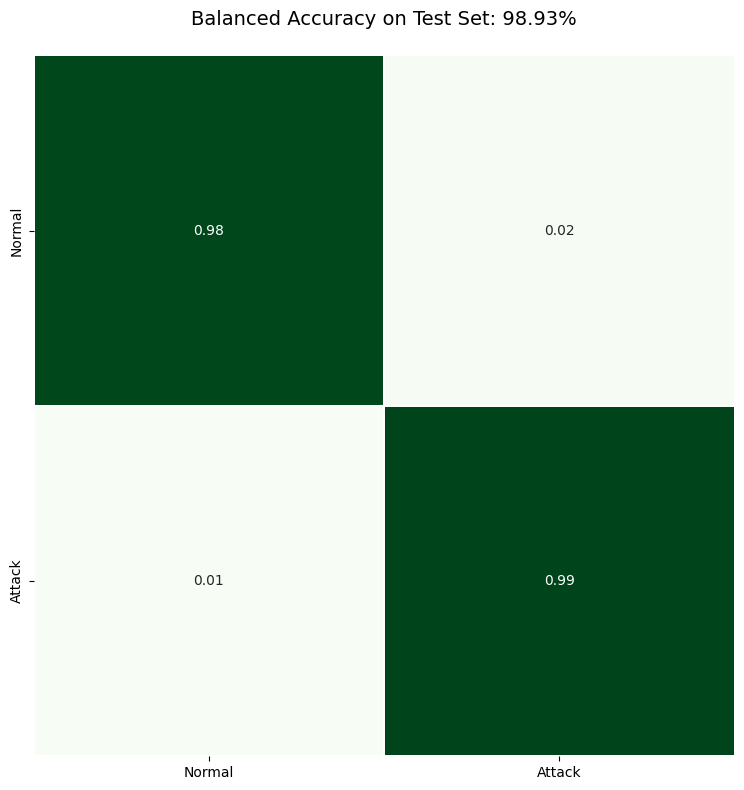

Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.98      0.99     48193
      Attack       0.98      0.99      0.99     48193

    accuracy                           0.99     96386
   macro avg       0.99      0.99      0.99     96386
weighted avg       0.99      0.99      0.99     96386



(0.9893345506608844,
 0.9893345506608844,
 0.989391527087696,
 0.9893345506608844,
 0.989334240225963)

In [ ]:
calculate_metrics(y_test, y_pred_lr, ['Normal', 'Attack'])

In [ ]:
# Exporting the model
from joblib import dump, load
dump(trained_lr, 'trained_lr_bin.joblib') 

# load with
# trained_lr = load('trained_lr_bin.joblib')

['trained_lr_bin.joblib']

### K-Nearest Neighbors (KNN) - 99.19%

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
time_to_train_knn, trained_knn, y_pred_knn = train_model(knn, 
                                                          X_train_std, 
                                                          y_train, 
                                                          X_test_std, 
                                                          y_test, 
                                                          ['Normal', 'Attack'], 
                                                          n_classes=2, 
                                                          use_best_model=False)

In [ ]:
time_to_train_knn

0.08327763500000174

Accuracy:0.99
Balanced accuracy:0.99
Precision:0.99
Recall:0.99
F1-score:0.99


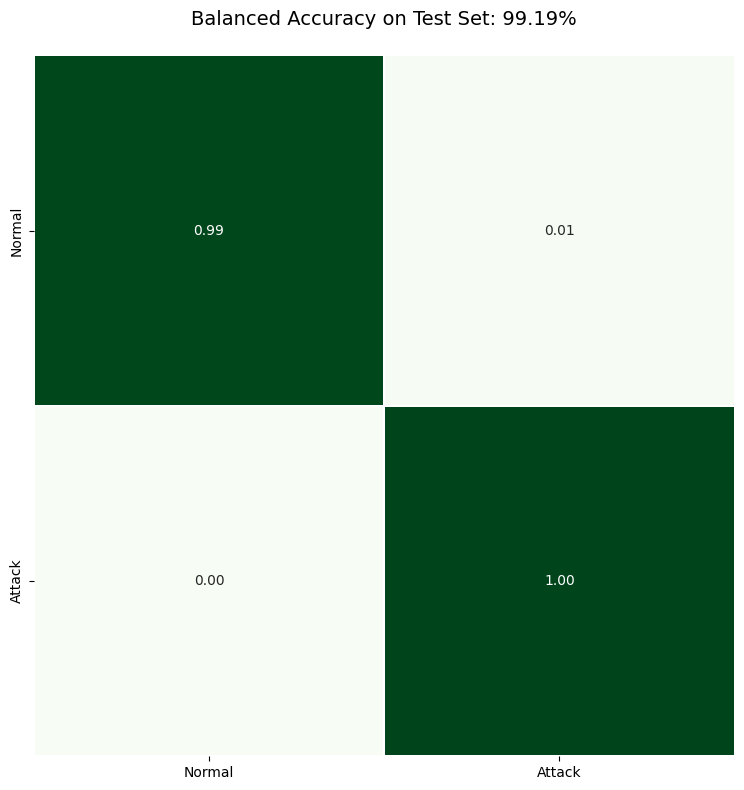

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     48193
      Attack       0.99      1.00      0.99     48193

    accuracy                           0.99     96386
   macro avg       0.99      0.99      0.99     96386
weighted avg       0.99      0.99      0.99     96386



(0.9919282883406304,
 0.9919282883406304,
 0.9919735007590721,
 0.9919282883406304,
 0.9919281028885739)

In [ ]:
start_time = process_time()
calculate_metrics(y_test, y_pred_knn, ['Normal', 'Attack'])

In [ ]:
inference_time = process_time() - start_time
inference_time

0.5970772099999522

In [ ]:
# Exporting the model
from joblib import dump, load
dump(trained_knn, 'trained_knn_bin.joblib') 

# load with
# trained_knn = load('trained_knn_bin.joblib')

['trained_knn_bin.joblib']

### Neural Network

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((546180, 22), (546180,), (96386, 22), (96386,))

In [ ]:
# Since there's no synthetic data in train, it is safe to split it into train and val
X_train, X_val, y_train, y_val, = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((436944, 22), (109236, 22), (436944,), (109236,))

In [ ]:
# standardize the data
stdsc = StandardScaler()
# fit and transform train
X_train_std = stdsc.fit_transform(X_train)

# only transform test and val
X_test_std = stdsc.transform(X_test)
X_val_std = stdsc.transform(X_val)

In [ ]:
X_train_std.shape, X_val_std.shape, X_test_std.shape

((436944, 22), (109236, 22), (96386, 22))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((436944,), (109236,), (96386,))

In [ ]:
X_train_std.dtype, X_test_std.dtype, X_val_std.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [ ]:
# convert to float32
X_train_std = np.asarray(X_train_std).astype('float32')
X_test_std = np.asarray(X_test_std).astype('float32')
X_val_std = np.asarray(X_val_std).astype('float32')

In [ ]:
# convert to float32 and reshape
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
np.unique(y_train), np.unique(y_val), np.unique(y_test)

(array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32))

#### Create the model

In [ ]:
# clear the sesssion
tf.keras.backend.clear_session()

In [2]:
inputs = keras.Input(shape=(22,))

features = layers.Dense(256, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
features = layers.Dense(128, activation="relu")(features)
features = layers.Dropout(0.5)(features)

outputs = layers.Dense(2, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 256)               5888      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 39,042
Trainable params: 39,042
Non-trainable p

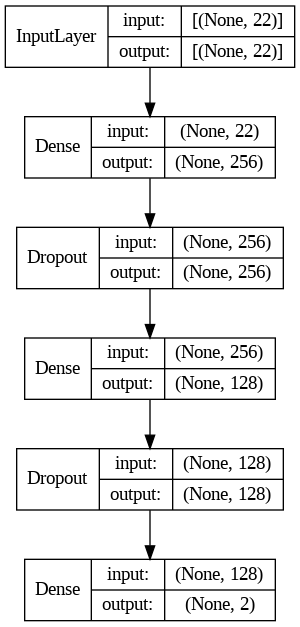

In [3]:
tf.keras.utils.plot_model(
    model,
    to_file='nn_mul_plot.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)


In [ ]:
inputs.shape, inputs.dtype

(TensorShape([None, 22]), tf.float32)

In [ ]:
features.shape

TensorShape([None, 128])

In [ ]:
# compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_acc",
        patience=5,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="./checkpoints/binary_params",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [ ]:
start_time = process_time()
# fit the model on training data
history = model.fit(X_train_std, y_train,
                            epochs=25,
                            batch_size=1024,
                            validation_data=(X_val_std, y_val))

Epoch 1/25
427/427 [==============================] - 8s 17ms/step - loss: 0.0662 - accuracy: 0.9829 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 2/25
427/427 [==============================] - 8s 18ms/step - loss: 0.0359 - accuracy: 0.9907 - val_loss: 0.0321 - val_accuracy: 0.9909
Epoch 3/25
427/427 [==============================] - 8s 18ms/step - loss: 0.0326 - accuracy: 0.9911 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 4/25
427/427 [==============================] - 7s 15ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 5/25
427/427 [==============================] - 8s 19ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0261 - val_accuracy: 0.9919
Epoch 6/25
427/427 [==============================] - 6s 15ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0248 - val_accuracy: 0.9920
Epoch 7/25
427/427 [==============================] - 8s 18ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0241 - val_accuracy: 0.9922

In [ ]:
time_to_train = process_time() - start_time
print(f'Time to train: {time_to_train}s')

Time to train: 249.02903867400005s


In [ ]:
val_acc = history.history["val_accuracy"]
train_acc = history.history["accuracy"]

val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

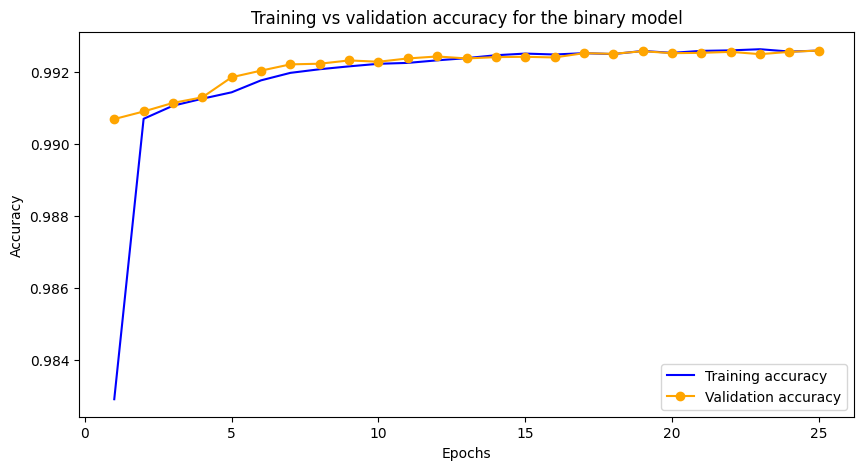

In [ ]:
epochs = range(1, len(val_acc)+1)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(epochs, train_acc, "b-", label="Training accuracy")
plt.plot(epochs, val_acc, "o-", label="Validation accuracy", color = 'orange')

plt.title("Training vs validation accuracy for the binary model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

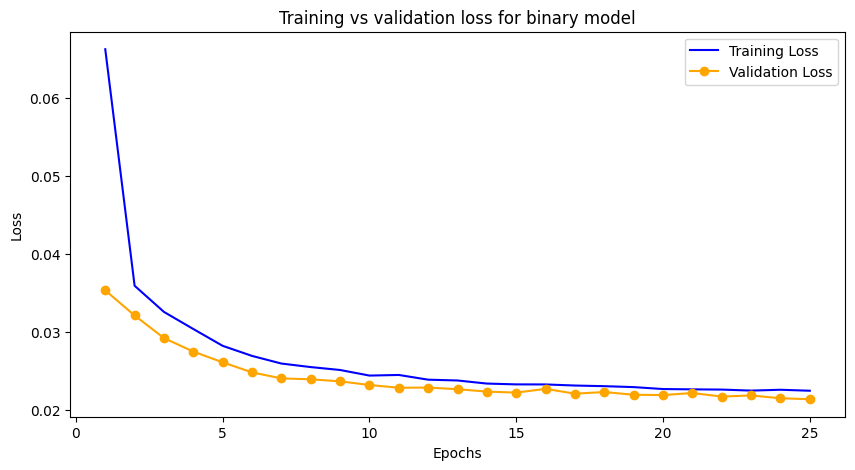

In [ ]:
epochs = range(1, len(val_acc)+1)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(epochs, train_loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "o-", label="Validation Loss", color = 'orange')

plt.title("Training vs validation loss for binary model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
test_metrics = model.evaluate(X_test_std, y_test, batch_size=64)
print("test loss, test acc:", test_metrics)

Evaluate on test data
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9930
test loss, test acc: [0.02097899653017521, 0.9929969310760498]


In [ ]:
#generate predictions
y_pred = model.predict(X_test_std)
y_pred[:10]

3013/3013 [==============================] - 4s 1ms/step


array([[9.9999994e-01, 0.0000000e+00],
       [9.9999207e-01, 7.8818621e-06],
       [9.9999994e-01, 6.9316197e-20],
       [9.9999994e-01, 2.9814400e-09],
       [9.9999994e-01, 1.3034636e-13],
       [9.9999994e-01, 2.8242021e-17],
       [9.9998623e-01, 1.3713986e-05],
       [9.9999994e-01, 2.5199241e-22],
       [9.9999994e-01, 9.8536779e-09],
       [9.9999994e-01, 1.6211366e-15]], dtype=float32)

In [ ]:
y_pred_ = tf.argmax(input=y_pred, axis=1)
np.unique(y_pred_)

array([0, 1])

In [ ]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [ ]:
codes = {'Normal':0,
         'Attack':1  
}
labels = [x for x in codes.keys()]
labels

['Normal', 'Attack']

Accuracy:0.99
Balanced accuracy:0.99
Precision:0.99
Recall:0.99
F1-score:0.99


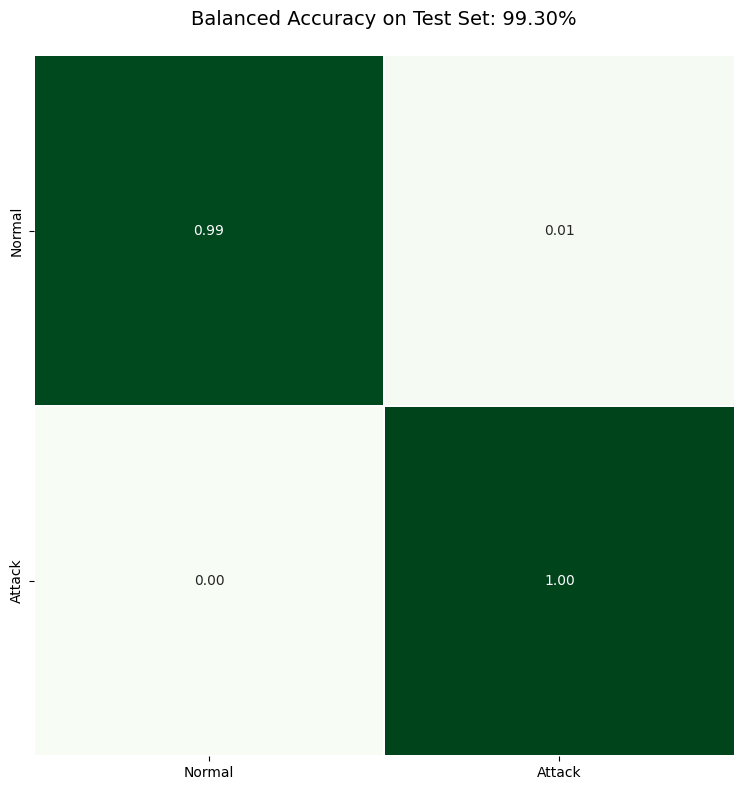

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     48193
      Attack       0.99      1.00      0.99     48193

    accuracy                           0.99     96386
   macro avg       0.99      0.99      0.99     96386
weighted avg       0.99      0.99      0.99     96386



(0.9929969082646858,
 0.9929969082646858,
 0.9930835953391691,
 0.9929969082646858,
 0.9929966004547)

In [ ]:
calculate_metrics(y_test, y_pred_, labels)

#### Export the model

In [ ]:
# Save the weights
model.save_weights('./sequential_bin_v1')

In [ ]:
# Create a new model instance
model_loaded = keras.Model(inputs=inputs, outputs=outputs)
# Compile the model
model_loaded.compile(optimizer="adam",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Restore the weights
model_loaded.load_weights('./sequential_bin_v1')

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
test_metrics_loaded = model_loaded.evaluate(X_test_std, y_test, batch_size=64)
# results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", test_metrics_loaded)

Evaluate on test data
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9928
test loss, test acc: [0.02365744113922119, 0.9927893877029419]


#### Exporting the history

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history_bin.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history_bin.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)